<a href="https://colab.research.google.com/github/wijdanebaoudane/Credit_model_/blob/main/credit_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importer les package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import  LabelEncoder
#pour diviser a base de donne
from sklearn.model_selection import StratifiedShuffleSplit
#POur inmpoter les algorithme
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#pur la fonction de decision
from sklearn.metrics import accuracy_score
# un package pour generer le model
import pickle

maintenant je vais importer la base de donner j'ai deja la enregistrer

In [ ]:
#lire la base de donnee
df = pd.read_csv('/content/train_u6lujuX_CVtuZ9i.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [ ]:
#voi le valeurs manquantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [ ]:
df.isnull().sum().sort_values(ascending=False)
# j'ai charcher dans la base de donnes dANs les cases il y'a des valeurs manquantes et je fait la somme par ordre


,0
Credit_History,50
Self_Employed,32
LoanAmount,22
Dependents,15
Loan_Amount_Term,14
Gender,13
Married,3
Loan_ID,0
Education,0
ApplicantIncome,0


In [ ]:
#pour voir les valeurs anormale
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [ ]:
df.describe(include='O')
# pour afficher les valeurs categoiques

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [ ]:
# renseigner les valeurs manquantes
#dans cette partie on a decider de deviser la dataset de mettre les valeurs categorique dans une data et les valeurs numeriques dans une autre data
cat_data=[]
num_data=[]
for i,c in enumerate(df.dtypes):
  if c==object:
    cat_data.append(df.iloc[:,i])
  else:
    num_data.append(df.iloc[:,i])
    #il faut transformer la liste en data c'est pour cela on a jouter DataFrame
    #transpose sert a changer l'emplacement de nom de colonne
cat_data=pd.DataFrame(cat_data).transpose()
num_data=pd.DataFrame(num_data).transpose()
num_data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,NaN,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [ ]:
#pour les variables categorique on va remplacer les valeurs manquantes avec les valeurs qui se repetent plus
# had "x.value_counts().index[0]" kat warina hadok li fihom bzaf donc fach ghadi nl9aw chi valeurs manquante ghdai n3awdoha bhadak le  mots li 9aynah kay t3awad bzaf
# o darna index 0 hit hadok li fihom bzaf kay kouno homa liwlin bhal le cas li dart f education
cat_data=cat_data.apply(lambda x:x.fillna(x.value_counts().index[0]))
cat_data.isnull().sum().any()

False

In [ ]:
cat_data['Education'].value_counts()

,count
Education,
Graduate,480
Not Graduate,134


In [ ]:
# maintenant pour les variables numerique on va remplacer les variables manquantes par la vleurs precedentes de la meme colonne
num_data.fillna(method='bfill',inplace=True)
num_data.isnull().sum().any()
num_data

<ipython-input-14-592f27612a20>:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  num_data.fillna(method='bfill',inplace=True)


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,5849.0,0.0,128.0,360.0,1.0
1,4583.0,1508.0,128.0,360.0,1.0
2,3000.0,0.0,66.0,360.0,1.0
3,2583.0,2358.0,120.0,360.0,1.0
4,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...
609,2900.0,0.0,71.0,360.0,1.0
610,4106.0,0.0,40.0,180.0,1.0
611,8072.0,240.0,253.0,360.0,1.0
612,7583.0,0.0,187.0,360.0,1.0


In [ ]:
#creer un dictionnaire
#on va transformer la colonne target a la place de y faire 1 et N faire 0 afin de faitre l'analyse apres

target_value={'Y':1,'N':0}
target=cat_data['Loan_Status']
cat_data.drop('Loan_Status',axis=1,inplace=True)
target=target.map(target_value)
target

,Loan_Status
0,1
1,0
2,1
3,1
4,1
...,...
609,1
610,1
611,1
612,1


In [ ]:
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,LP001002,Male,No,0,Graduate,No,Urban
1,LP001003,Male,Yes,1,Graduate,No,Rural
2,LP001005,Male,Yes,0,Graduate,Yes,Urban
3,LP001006,Male,Yes,0,Not Graduate,No,Urban
4,LP001008,Male,No,0,Graduate,No,Urban
...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,Rural
610,LP002979,Male,Yes,3+,Graduate,No,Rural
611,LP002983,Male,Yes,1,Graduate,No,Urban
612,LP002984,Male,Yes,2,Graduate,No,Urban


In [ ]:
#Remplacer les valeuts categoriques par des valeuirs numeriques 0,1,2,3.....
le=LabelEncoder()
for i in cat_data:
  cat_data[i]=le.fit_transform(cat_data[i])
cat_data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,0,1,0,0,0,0,2
1,1,1,1,1,0,0,0
2,2,1,1,0,0,1,2
3,3,1,1,0,1,0,2
4,4,1,0,0,0,0,2
...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,0
610,610,1,1,3,0,0,0
611,611,1,1,1,0,0,2
612,612,1,1,2,0,0,2


In [ ]:
# Suppimer loan_id
cat_data.drop('Loan_ID',axis=1,inplace=True)


In [ ]:
cat_data

,Gender,Married,Dependents,Education,Self_Employed,Property_Area
0,1,0,0,0,0,2
1,1,1,1,0,0,0
2,1,1,0,0,1,2
3,1,1,0,1,0,2
4,1,0,0,0,0,2
...,...,...,...,...,...,...
609,0,0,0,0,0,0
610,1,1,3,0,0,0
611,1,1,1,0,0,2
612,1,1,2,0,0,2


In [ ]:
#Concatener cat_data et num_data et specifier la colonne target
# x cv etre pou les valeurs independantes , c la ou je dois mettre est ce que la personne aura un credit ou pas
#y la reponse de la banque
x=pd.concat([cat_data,num_data],axis=1)
y=target
x

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0


# on a fait le nettoyage de la base de donner , apres on vas faire l'analyse exploiratoire de notre base de donner

# Etape 2: Realiser une analyse exploratoire (EDA)

In [ ]:
# ON VA commencer par la variable target
target.value_counts()
# les credit accdepter sont 422 et les credit refuser sont 192

,count
Loan_Status,
1,422
0,192


In [ ]:
#la base de donnee utilisee pour l'analyse exploratoire EDA
df=pd.concat([cat_data,num_data,target],axis=1)
df

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
0,1,0,0,0,0,2,5849.0,0.0,128.0,360.0,1.0,1
1,1,1,1,0,0,0,4583.0,1508.0,128.0,360.0,1.0,0
2,1,1,0,0,1,2,3000.0,0.0,66.0,360.0,1.0,1
3,1,1,0,1,0,2,2583.0,2358.0,120.0,360.0,1.0,1
4,1,0,0,0,0,2,6000.0,0.0,141.0,360.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,0,2900.0,0.0,71.0,360.0,1.0,1
610,1,1,3,0,0,0,4106.0,0.0,40.0,180.0,1.0,1
611,1,1,1,0,0,2,8072.0,240.0,253.0,360.0,1.0,1
612,1,1,2,0,0,2,7583.0,0.0,187.0,360.0,1.0,1


<ipython-input-23-fdce21fc914e>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=target, palette=palette)


Le pourcentage des crédits accordés est : 68.73%
Le pourcentage des non-crédits accordés est : 31.27%


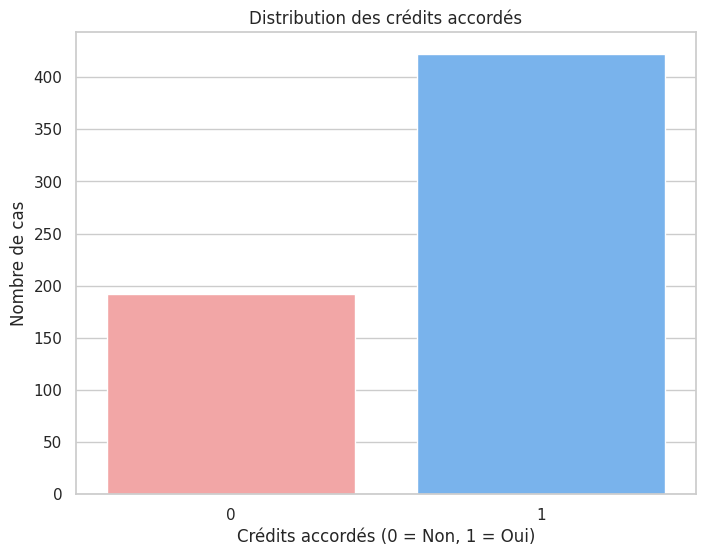

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous d'utiliser le style de graphique souhaité
sns.set(style='whitegrid')

# Visualisation avec des couleurs personnalisées
plt.figure(figsize=(8, 6))
# Utiliser une palette personnalisée
palette = ['#ff9999', '#66b3ff']  # Couleurs personnalisées pour chaque barre

sns.countplot(x=target, palette=palette)

# Ajout des titres et labels
plt.title('Distribution des crédits accordés')
plt.xlabel('Crédits accordés (0 = Non, 1 = Oui)')
plt.ylabel('Nombre de cas')

# Calcul des pourcentages
yes = target.value_counts()[1] / len(target) * 100  # Pourcentage de crédits accordés (1)
no = target.value_counts()[0] / len(target) * 100    # Pourcentage de crédits non accordés (0)

# Affichage des pourcentages
print(f'Le pourcentage des crédits accordés est : {yes:.2f}%')
print(f'Le pourcentage des non-crédits accordés est : {no:.2f}%')

# Afficher le graphique
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


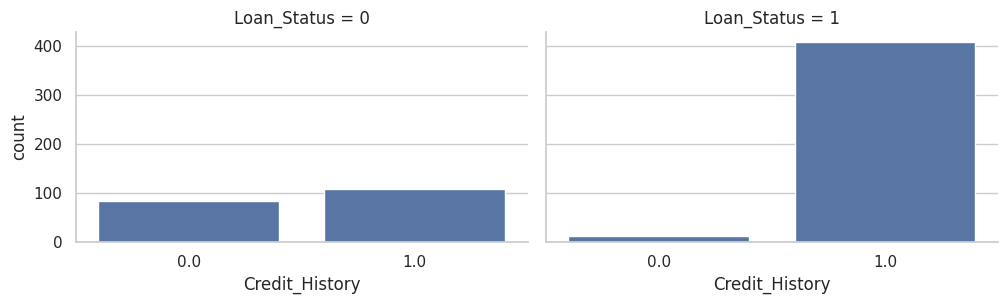

In [ ]:
# Credit history
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2 ,aspect=1.6)
grid.map(sns.countplot,'Credit_History')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


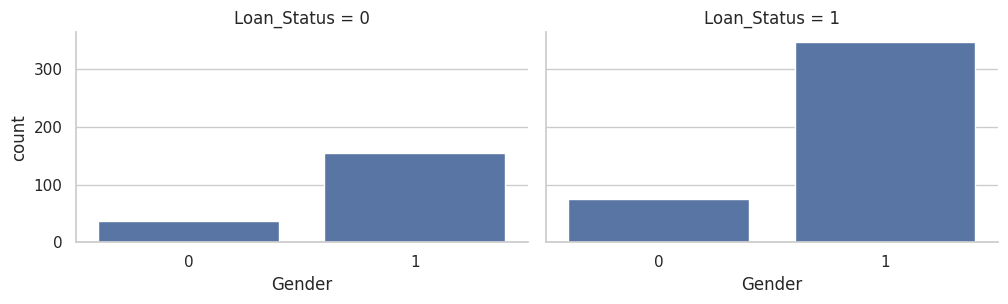

In [ ]:
# Sexe history
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2 ,aspect=1.6)
grid.map(sns.countplot,'Gender')

/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:718: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


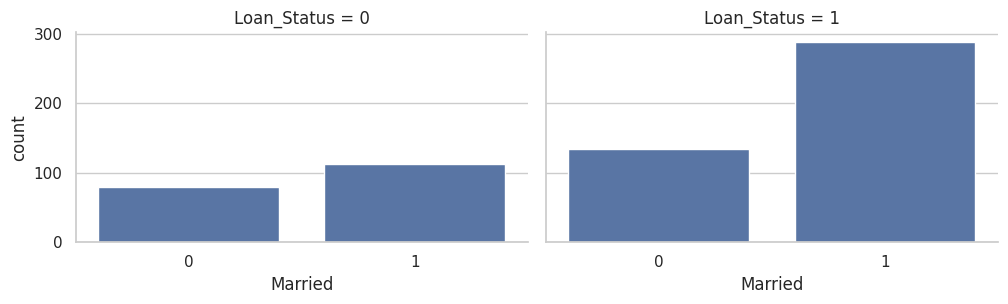

In [ ]:
# Married history
grid=sns.FacetGrid(df,col='Loan_Status',height=3.2 ,aspect=1.6)
grid.map(sns.countplot,'Married')

D'apres ce diagramme on voit pour les personne marrried on un credit acceptes loan_status = 1

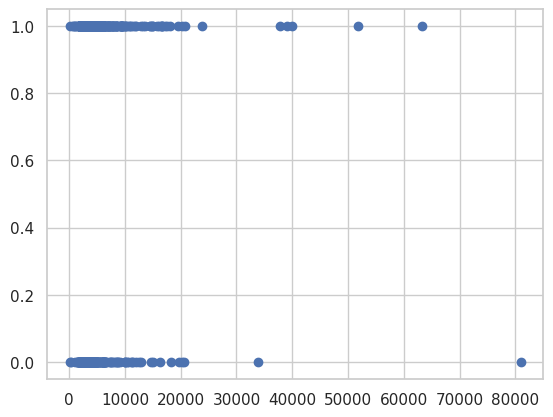

In [ ]:
# revenu dU demandeur
plt.scatter(df['ApplicantIncome'],df['Loan_Status'])

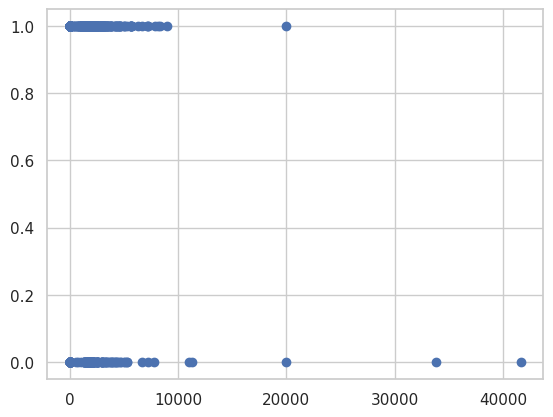

In [ ]:
plt.scatter(df['CoapplicantIncome'],df['Loan_Status'])

In [ ]:
df.groupby('Loan_Status').median()

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,,,,,,,
0,1.0,1.0,0.0,0.0,0.0,1.0,3833.5,268.0,132.5,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,1.0,3812.5,1239.5,127.5,360.0,1.0


apres l'analyse on fait la presentation du model
<b>etape 3:Ralisation du model </b>

* on va realiser un model on se basant sur les algo de ML

In [ ]:
#avant de developper notre model on va deviser notre base de donne en 2 une pour l'entrainement et la 2eme pour le test
#je vais instancier de ma divisiant appler sss ,indiquer le nbr de splits et la partie teste size et je faire random state pour trouver le meme resultat
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(x,y):
  x_train,x_test=x.iloc[train],x.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]
print('x_train taille :' ,x_train.shape)
print('x_test taille :' ,x_test.shape)
print('y_train taille :' ,y_train.shape)
print('y_test taille :' ,y_test.shape)

x_train taille : (491, 11)
x_test taille : (123, 11)
y_train taille : (491,)
y_test taille : (123,)


In [ ]:
# On va appliquer trois algorithme Logistic Regression, KNN, DecisionTree
models={
     'LogisticRegression':LogisticRegression(random_state=42),
     'KNeighborsClassifier':KNeighborsClassifier(),
     'DecisionTreeClassifier':DecisionTreeClassifier(max_depth=1,random_state=42)
 }
# la fonction de precision
def accu(y_true,y_pred,retu=False):
  acc=accuracy_score(y_true,y_pred)
  if retu:
    return acc
  else:
      print(f'la precision du modele est:{acc}')
#La fonction d'application des models
def train_test_eval(models,x_train,y_train,x_test,y_test):
  for name,model in models.items():
    print(name,':')
    model.fit(x_train,y_train)
    accu(y_test,model.predict(x_test))
    print('_'*30)

train_test_eval(models,x_train,y_train,x_test,y_test)


LogisticRegression :
la precision du modele est:0.8536585365853658
______________________________
KNeighborsClassifier :
la precision du modele est:0.6504065040650406
______________________________
DecisionTreeClassifier :
la precision du modele est:0.8455284552845529
______________________________


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#je veis choisir quelque variable
#la deuxieme base de donner pour fair le deploiement de mon model
x_2=x[['Credit_History','Married','CoapplicantIncome']]
x_2

,Credit_History,Married,CoapplicantIncome
0,1.0,0,0.0
1,1.0,1,1508.0
2,1.0,1,0.0
3,1.0,1,2358.0
4,1.0,0,0.0
...,...,...,...
609,1.0,0,0.0
610,1.0,1,0.0
611,1.0,1,240.0
612,1.0,1,0.0


In [ ]:
#avant de developper notre model on va deviser notre base de donne en 2 une pour l'entrainement et la 2eme pour le test
#je vais instancier de ma divisiant appler sss ,indiquer le nbr de splits et la partie teste size et je faire random state pour trouver le meme resultat
# je vais redefinir x et y
sss=StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train,test in sss.split(x_2,y):
  x_train,x_test=x_2.iloc[train],x_2.iloc[test]
  y_train,y_test=y.iloc[train],y.iloc[test]
print('x_train taille :' ,x_train.shape)
print('x_test taille :' ,x_test.shape)
print('y_train taille :' ,y_train.shape)
print('y_test taille :' ,y_test.shape)

x_train taille : (491, 3)
x_test taille : (123, 3)
y_train taille : (491,)
y_test taille : (123,)


In [ ]:
train_test_eval(models,x_train,y_train,x_test,y_test)

LogisticRegression :
la precision du modele est:0.8536585365853658
______________________________
KNeighborsClassifier :
la precision du modele est:0.6991869918699187
______________________________
DecisionTreeClassifier :
la precision du modele est:0.8455284552845529
______________________________


In [ ]:
#Maintanant on va implementer le model on utilisant flask
#appliquer la regression logistique sur notre base de donnee
Classifier=LogisticRegression()
Classifier.fit(x_2,y)

LogisticRegression()

In [ ]:
#enregister le model
pickle.dump(Classifier,open('model.pkl','wb'))